<a href="https://colab.research.google.com/github/luthfijuliandri/Intelligence-System/blob/main/UAS_Intelligence_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS INTELLIGENCE SYSTEM**



## **ANALISIS SENTIMEN ULASAN APLIKASI GOJEK DI GOOGLE PLAY STORE MENGGUNAKAN ALGORITMA NAÏVE BAYES**


Anggota Kelompok
1.   Muhammad Luthfi Juliandri - 4521210078
2.   Berry Heart Johannes Purba - 4522218002

# Import Library

In [224]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [225]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Import Dataset kedalam file notebook

Dataset yang digunakan adalah "Gojek Playstore Reviews" dengan link https://www.kaggle.com/datasets/dewanakretarta/gojek-playstore-reviews

In [226]:
df = pd.read_csv('/content/scrapped_TikTok_ID.csv')

In [227]:
print(f"Jumlah total data: {len(df)}")

Jumlah total data: 99000


In [247]:
print("\nContoh Data Ulasan:")
df[['content', 'score']].head()



Contoh Data Ulasan:


,content,score
0,Aplikasi GK jelas suka keluar sendiri lelet is...,1
1,Knpa yaaa di tiktok aku nggk bisa chatan Padah...,5
2,gaje banget pdahal wifi lancar tpi gabisa dipa...,1
3,Aplikasi gak bener! Yang tolol tolol di fyp in...,1
4,Knap ya sya mau login tiktok ngak bisa?,5


# Preprocessing Data

Drop baris yang memiliki nilai kosong pada kolom 'content' dan 'score'

In [229]:
df = df.dropna(subset=['content', 'score'])

Tidak memakai score 3 karena terlalu ambigu apakah sentimen tersebut bernilai negatif atau positif

In [230]:
df = df[df['score'] != 3]

Melakukan pelabelan dimana score 1 dan 2 adalah negatif, 4 dan 5 positif

In [231]:
def label_sentiment(score):
    if score >= 4:
        return "Positif"
    else:
        return "Negatif"

df['Sentiment'] = df['score'].apply(label_sentiment)

<ipython-input-231-d395e754e704>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['score'].apply(label_sentiment)


In [232]:
print("\nData dengan Kolom Sentimen Baru:")
df[['content', 'score', 'Sentiment']].head()


Data dengan Kolom Sentimen Baru:


,content,score,Sentiment
0,Aplikasi GK jelas suka keluar sendiri lelet is...,1,Negatif
1,Knpa yaaa di tiktok aku nggk bisa chatan Padah...,5,Positif
2,gaje banget pdahal wifi lancar tpi gabisa dipa...,1,Negatif
3,Aplikasi gak bener! Yang tolol tolol di fyp in...,1,Negatif
4,Knap ya sya mau login tiktok ngak bisa?,5,Positif


<ipython-input-233-5d111dd7ac43>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


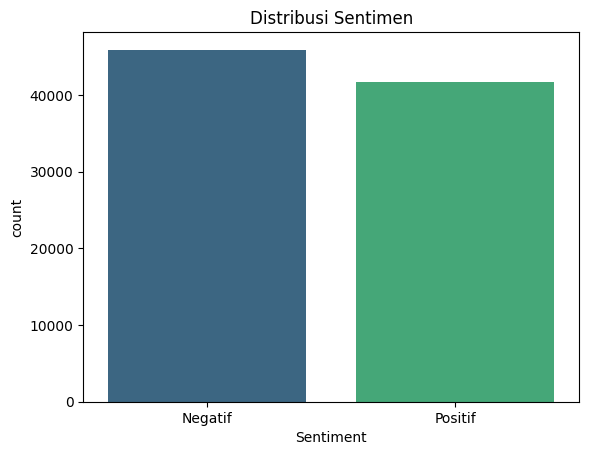

In [233]:
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title("Distribusi Sentimen")
plt.show()

Load dan set stopworks agar menghapus kata kata tidak perlu

In [234]:
def load_stopwords(filepath):
    stopword_dict = pd.read_csv(filepath, header=None, encoding='latin-1')
    stopword_dict = stopword_dict.rename(columns={0: 'stopword'})
    return set(stopword_dict['stopword'].values)

stopwords_set = load_stopwords('/content/stopwordbahasa.csv')

Bersihkan text dari link, symbol dan buat text dalam lowercase

In [235]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_set])
    return text

Apply clean_text

In [236]:
df['Cleaned_Content'] = df['content'].apply(clean_text)


# Trensformation

Split Data

In [237]:
X = df['Cleaned_Content']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Konversi teks menjadi representasi numerik

In [238]:
vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Data Mining

In [239]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

# Evaluation

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.78      0.88      0.83      9169
     Positif       0.85      0.72      0.78      8358

    accuracy                           0.81     17527
   macro avg       0.81      0.80      0.80     17527
weighted avg       0.81      0.81      0.80     17527

Confusion Matrix:


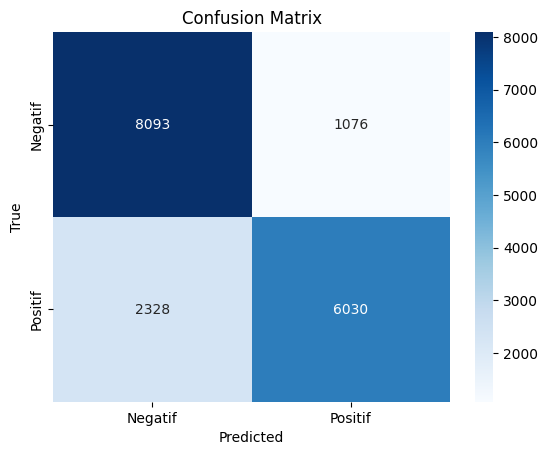

In [240]:
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [241]:

df['Predicted_Sentiment'] = model.predict(vectorizer.transform(df['Cleaned_Content']))


positive_text = ' '.join(df[df['Predicted_Sentiment'] == 'Positif']['Cleaned_Content'])
negative_text = ' '.join(df[df['Predicted_Sentiment'] == 'Negatif']['Cleaned_Content'])

positive_tokens = word_tokenize(positive_text)
negative_tokens = word_tokenize(negative_text)

positive_word_counts = Counter(positive_tokens)
negative_word_counts = Counter(negative_tokens)


top_positive = positive_word_counts.most_common(20)
top_negative = negative_word_counts.most_common(20)


In [248]:
def plot_word_counts(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Words')
    plt.xticks(rotation=45)
    plt.show()




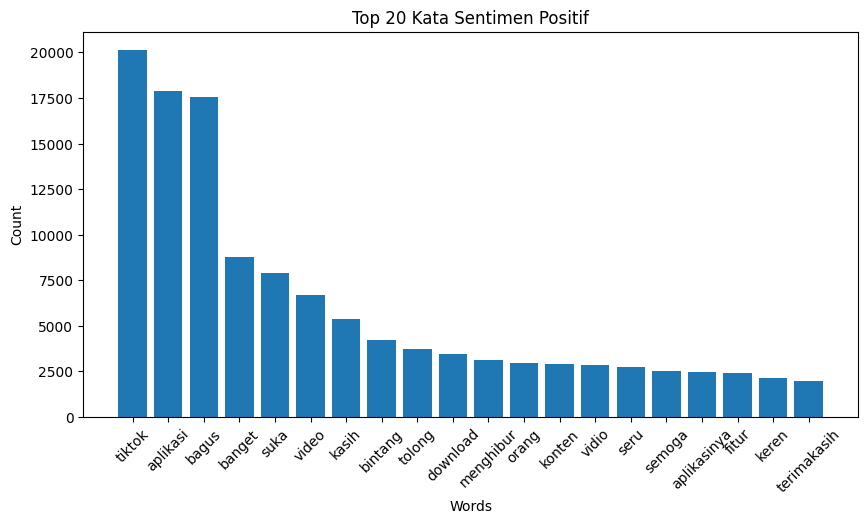

In [250]:
plot_word_counts(top_positive, "Top 20 Kata Sentimen Positif")

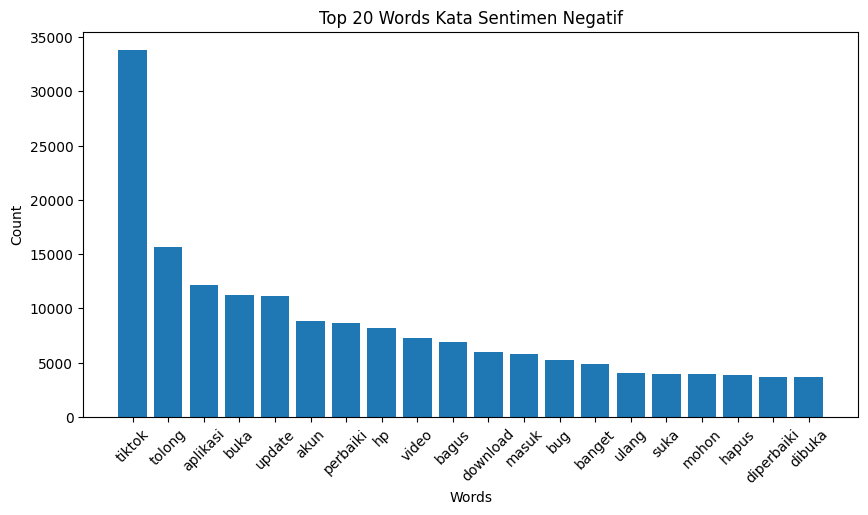

In [251]:
plot_word_counts(top_negative, "Top 20 Words Kata Sentimen Negatif")